In [1]:
import pandas 
import seaborn as sns

# General Info about the Dataset

Official note for this dataset from Kaggle: 

The dataset is scraped from the Glassdoor website using Selenium scrapper. After scrapping, the raw dataset was cleaned and made usable for performing data analysis and modelling. The dataset contains information about the minimum salary, maximum salary, average salary, job description, age of the company in years, etc.
Note: -1 value in any column means either the information was not available or selenium was not able to scrap it.

**Link to Kaggle** https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor?select=data_cleaned_2021.csv

Let's explore this dataset and metadata to estimate if we should clean and prepare data for further analysis. According to the description from Kaggle, the data have been prepared, but let's double-check to make sure there are no hidden missing values. 

In [2]:
ds = pandas.read_csv("/data/workspace_files/data_cleaned_2021.csv")

print(ds.shape)
display(ds.info())

(742, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16

None

In [3]:
display(ds.sample(5))

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
182,215,"VP, Data Science",$83K-$166K (Glassdoor est.),Oversee a team of Data Scientists with overall...,3.2,PennyMac\n3.2,"Phoenix, AZ","Westlake Village, CA",1001 - 5000,2008,...,1,0,0,0,0,0,0,data scientist,na,na
81,89,Jr. Business Data Analyst,$37K-$76K (Glassdoor est.),"Hi there! We're WebFX, a full-service digital ...",4.7,webfx.com\n4.7,"Harrisburg, PA","Harrisburg, PA",201 - 500,1997,...,0,0,0,0,0,0,1,analyst,jr,na
685,879,Data Scientist,$51K-$88K (Glassdoor est.),Job Description Header 2 Data scientist Locati...,4.3,Solugenix Corporation\n4.3,"Phoenix, AZ","Brea, CA",201 - 500,1969,...,0,0,0,0,0,0,0,data scientist,na,na
477,609,Data Analyst,$42K-$77K (Glassdoor est.),The mission of Success Academies is to reimagi...,3.1,Success Academy Charter Schools\n3.1,"New York, NY","New York, NY",1001 - 5000,2006,...,0,0,0,0,0,0,0,analyst,na,na
41,43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 - 50,-1,...,0,0,0,0,0,0,0,data engineer,na,na


According to the metadata, there are 742 entries with 42 parameters with no missing values. However, having looked at a sample, we can see that some columns have "unknown" or "na" values. We should have that in mind. 
Also, many parameters have 'object' data type, but some of them might be categorized.

- #Data Preparation
- #split DS and DE based on job_title_sim column and separate them if possible
- #split top and bottom in salary range -- check Lower and Upper Salary and Avg Salary(K) columns
- #For location split cities and states
- #categorize Size
- #categorize Industry
- #categorize degree

- #explore everything for missing values

# Data Preprocessing (Missing values, Data types conversion including Categorization)

In [3]:
display(ds["Size"].unique()) #посчитать и сделать гистограмму
display(ds["Industry"].unique())
display(ds["Sector"].unique()) #посмотреть потом, как по секторам зп распределяются

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [4]:
display(ds["job_title_sim"].unique()) #посчитать сколько каких

display(ds["Job Location"].unique()) #чувак уже разбил по штатам, красава

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [5]:
columns = ['Rating', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Job Location']

display(ds[columns].describe())

,Rating,Lower Salary,Upper Salary,Avg Salary(K)
count,742.000000,742.000000,742.000000,742.000000
mean,3.618868,74.754717,128.214286,101.484501
std,0.801210,30.945892,45.128650,37.482449
min,-1.000000,15.000000,16.000000,15.500000
25%,3.300000,52.000000,96.000000,73.500000
50%,3.700000,69.500000,124.000000,97.500000
75%,4.000000,91.000000,155.000000,122.500000
max,5.000000,202.000000,306.000000,254.000000


In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


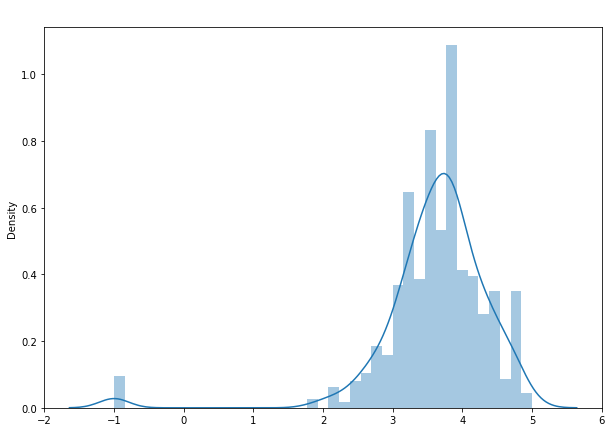

In [7]:
#DO NOT FORGET TO DROP -1 VALUES (BY QUERY METHOD?)
#TO FIGURE OUT ABOUT DENSITY AND BINS
#TO MAKE A LOOP FOR THESE 4 PLOTS?

fig, ax = plt.subplots(figsize=(10,7))
#ax = sns.distplot(crowded_streets['number'])
#bins = int(np.sqrt(crowded_streets.shape[0])
#crowded_streets['number'].hist(bins=bins)    #this code doesn't execute for some reason
ax = sns.distplot(ds['Rating'])
plt.xlabel(" ")
plt.title(" ", fontsize=20 )

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


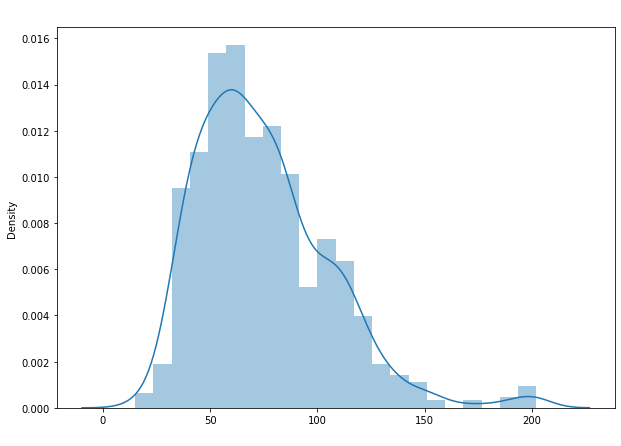

In [8]:
#TO FIGURE OUT ABOUT DENSITY AND BINS

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.distplot(ds['Lower Salary'])
plt.xlabel(" ")
plt.title(" ", fontsize=20 )

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


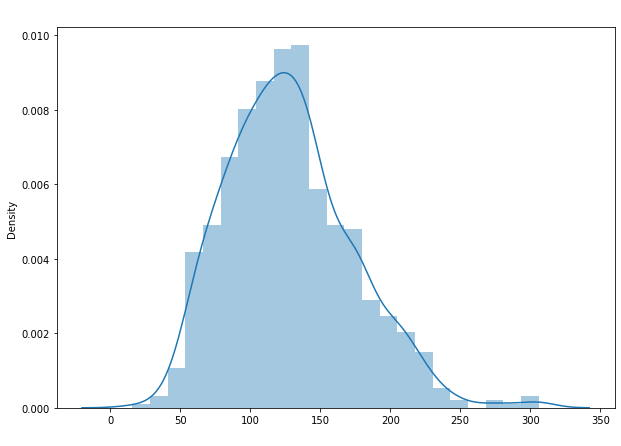

In [9]:
#TO FIGURE OUT ABOUT DENSITY AND BINS

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.distplot(ds['Upper Salary'])
plt.xlabel(" ")
plt.title(" ", fontsize=20 )

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


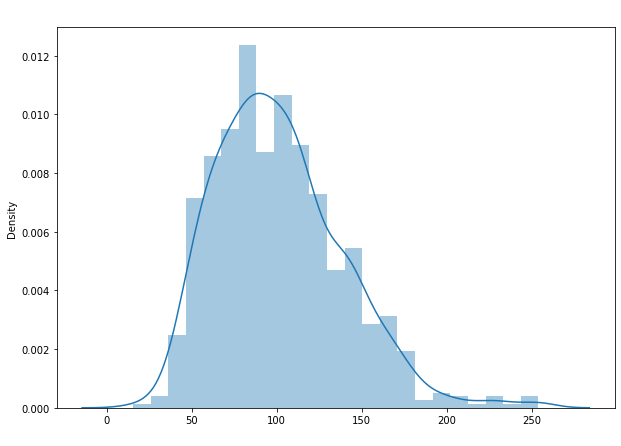

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.distplot(ds['Avg Salary(K)'])
plt.xlabel(" ")
plt.title(" ", fontsize=20 )

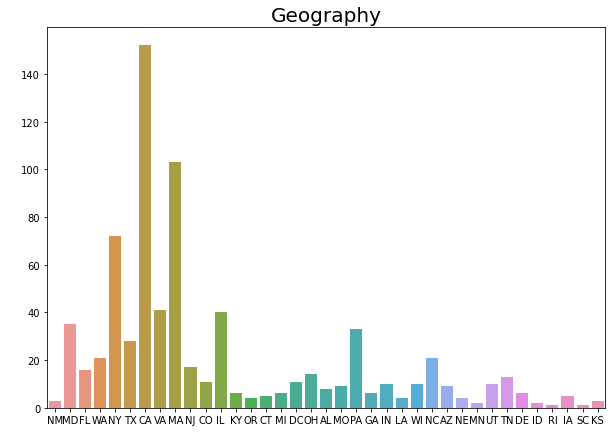

In [16]:

fig,ax = plt.subplots(figsize=(10,7))
ax = sns.countplot(x='Job Location', data=ds) 
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("Geography", fontsize=20 )

#to use a real map

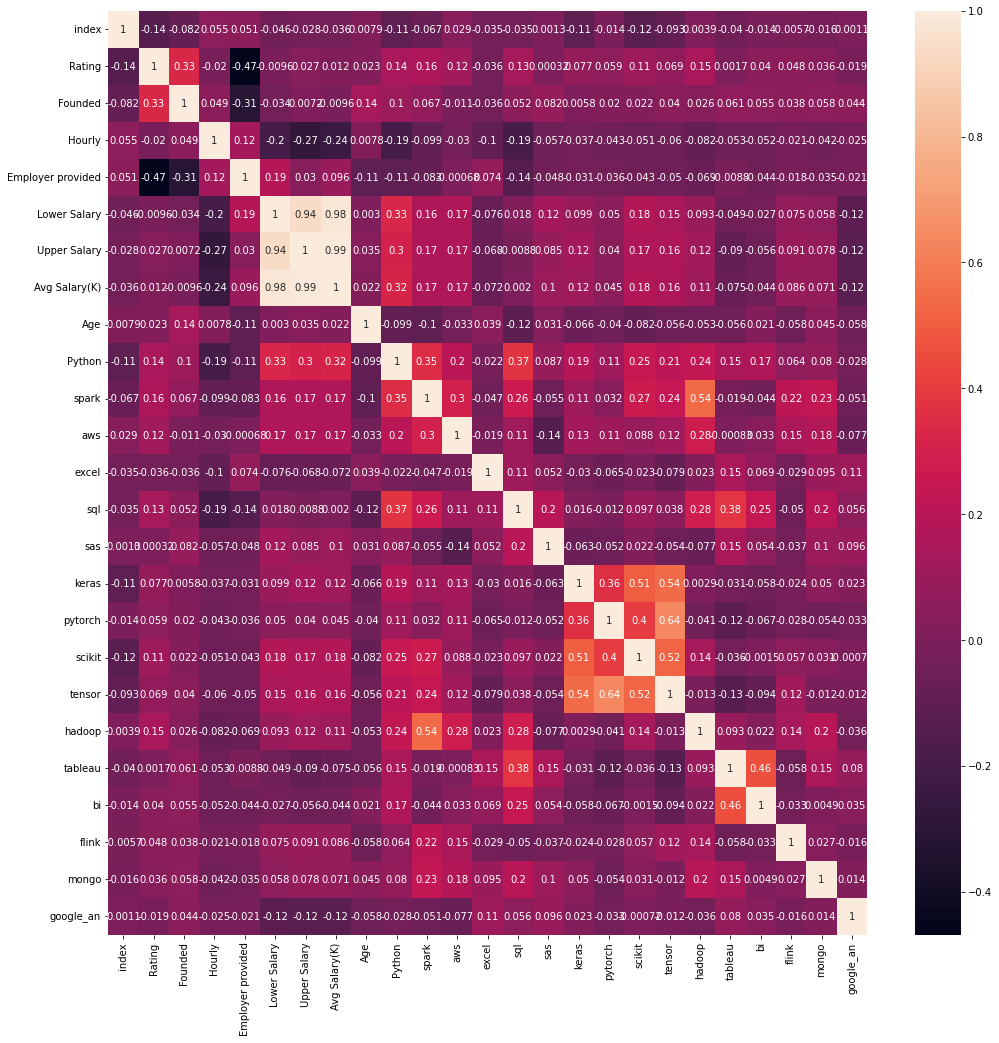

In [15]:
#to make a few slices and check correlations

plt.figure(figsize=(17, 17))
sns.heatmap(ds.corr(), annot=True)
plt.show()

#to make slices via .pivot_tables (EDA sprint)